# Introduction

The goals of this project are to determine who the peole are who have been committing credit card fraud, to determine which method is the best to use with the Credit Card dataset regarding Supervised Learning, to determine which method is best to use with the Credit Card dataset regarding Unsupervised Learning. The first thing to do is to use Exploratory Data Analysis with converting words to numbers and with plotting a few histograms and box plots regarding amount and class. Next is to obtain the statistics of these histograms and box plots then to use feature engineering on the data regarding variables and features. Once the feature engineering is carried out, the univariate analysis graphs and bivariate analysis graphs are to be plotted, and the findings of the graphs are to be used to determine who the people committing credit card fraud are. 

After this, the Credit Card dataset is to be used with the methods of Gradient Boosting, Random Forest, KNN Classifier, Logistic Regression, and Decision regarding the cross_val_scores, accuracy scores, precision scores, recall scores, and F1 scores to determine which Supervised Learning method is the best to use with the Credit Card dataset. Once this is done, the Credit Card dataset is to be used with the Unsupervised Learning methods of K-means and Gaussian Mixture Models regarding silhouette scores to determine which method should be used with the dataset. A proposal is then to be given on how to address the credit card fraud. These are the things that will be done for this project.

In [1]:
# Important Note:

# Do not drop time from the dataset in my Jupyter Notebook
# Use seconds for the units of time
# V1 through V28 have no units becauase they are PCA numbers
# Do class balancing, resampling in sklearn 
# resample sklearn (put it with he other imports)
# I do this in Feature Engineering 1


# Supervised Learning

# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import math
from sklearn.decomposition import PCA
import time
import umap
import sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import fetch_openml
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import datasets, metrics
from sqlalchemy import create_engine
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

In [3]:
df = pd.read_excel(r'C:\Users\Darin Peacock\Documents\Creditcard.xlsx')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [6]:
# There are 284,807 customers regarding the credit cards.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null int64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26    

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [10]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()*100/df.isnull().count()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

There are no missing data.

In [12]:
#df = resample(df, n_samples=5, replace=False, stratify=df, random_state=0)

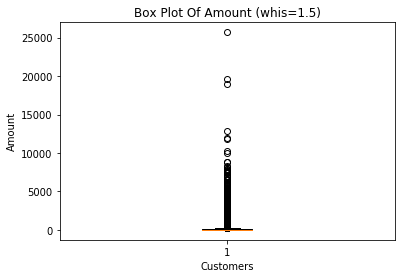

In [13]:
# Box plot for amount category (whis=1.5)

plt.boxplot(df["Amount"])
plt.title("Box Plot Of Amount (whis=1.5)")
plt.xlabel("Customers")
plt.ylabel("Amount")
plt.show()

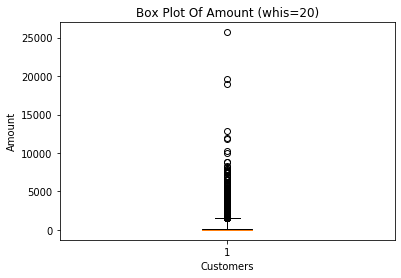

In [14]:
# Box plot for amount category (whis=20)

plt.boxplot(df["Amount"], whis=20)
plt.title("Box Plot Of Amount (whis=20)")
plt.xlabel("Customers")
plt.ylabel("Amount")
plt.show()

In [15]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

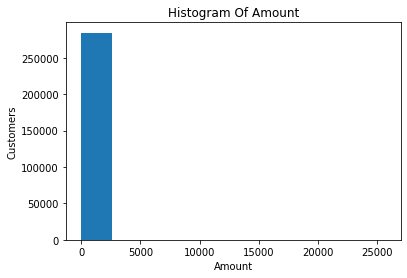

In [16]:
# Histogram for amount category

plt.hist(df["Amount"])
plt.title("Histogram Of Amount")
plt.xlabel("Amount")
plt.ylabel("Customers")
plt.show()

All 284807 customers paid amounts of money from 0 dollars to about 2500 dollars.

In [17]:
# The score thresholds, the indices of the outliers, and the numbers of outliers of the amount category

from scipy.stats import zscore

z_scores = zscore(df["Amount"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([     2,     51,     89, ..., 284732, 284733, 284735], dtype=int64),)
Number of outliers is: 15710
The score threshold is: 2
The indices of the outliers:
(array([    51,     89,    140, ..., 284573, 284712, 284732], dtype=int64),)
Number of outliers is: 7319
The score threshold is: 3
The indices of the outliers:
(array([    51,     89,    140, ..., 284383, 284497, 284528], dtype=int64),)
Number of outliers is: 4076
The score threshold is: 4
The indices of the outliers:
(array([    51,     89,    164, ..., 284249, 284383, 284497], dtype=int64),)
Number of outliers is: 2555


In [18]:
# The score thresholds and the numbers of outliers of the amount category

q75, q25 = np.percentile(df["Amount"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["Amount"] > max_val) 
                      | (df["Amount"] < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 40376
The score threshold is: 1.5
Number of outliers is: 31904
The score threshold is: 2.0
Number of outliers is: 26132
The score threshold is: 2.5
Number of outliers is: 22055
The score threshold is: 3.0
Number of outliers is: 18941
The score threshold is: 3.5
Number of outliers is: 16275
The score threshold is: 4.0
Number of outliers is: 14294
The score threshold is: 4.5
Number of outliers is: 12677


In [19]:
# Winsorization of the amount category

from scipy.stats.mstats import winsorize

winsorized_views = winsorize(df["Amount"], (0, 0.10))

winsorized_views

masked_array(data=[149.62,   2.69, 203.  , ...,  67.88,  10.  , 203.  ],
             mask=False,
       fill_value=1e+20)

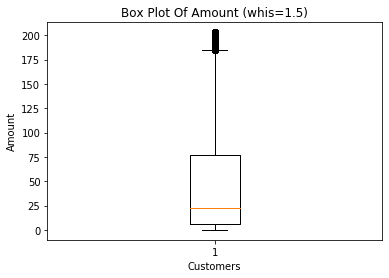

In [20]:
# Box plot for the tenure category

plt.boxplot(winsorized_views)
plt.title("Box Plot Of Amount (whis=1.5)")
plt.xlabel("Customers")
plt.ylabel("Amount")
plt.show()

In [21]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

The median amount is 22 dollars, the maximum amount is 25691 dollars, the minimum amount is 0 dollars, the 25th percentile amount is 5.60 dollars, and the 75th percentile amount is about 77.17 dollars.

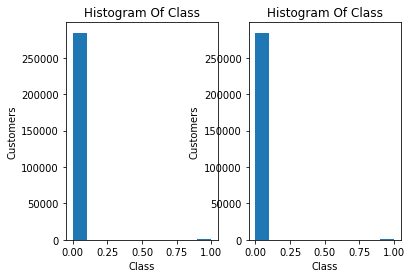

In [22]:
# Two histograms regarding senior citizens

plt.subplot(1,2,1)
plt.hist(df["Class"])
plt.title("Histogram Of Class")
plt.xlabel("Class")
plt.ylabel("Customers")

plt.subplot(1,2,2)
plt.hist(df["Class"])
plt.title("Histogram Of Class")
plt.xlabel("Class")
plt.ylabel("Customers")
plt.show()

Approximately 98% of the customers are in Class 0 while approximately 2% of the customers are in Class 1.

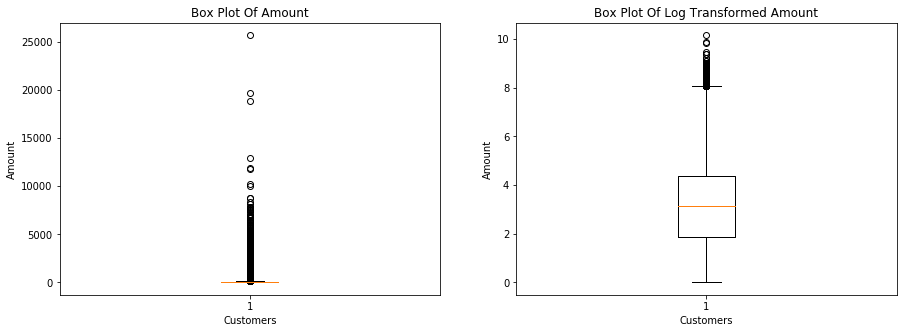

In [23]:
# Box plots of tenure and log transformed amount

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df["Amount"])
plt.xlabel("Customers")
plt.ylabel("Amount")
plt.title("Box Plot Of Amount")

plt.subplot(1,2,2)
plt.boxplot(np.log(df["Amount"]+1))
plt.xlabel("Customers")
plt.ylabel("Amount")
plt.title("Box Plot Of Log Transformed Amount")
plt.show()

In [24]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [25]:
np.log(df["Amount"]+1).describe()

count    284807.000000
mean          3.152188
std           1.656648
min           0.000000
25%           1.887070
50%           3.135494
75%           4.358822
max          10.153941
Name: Amount, dtype: float64

In [26]:
# The score thresholds and the numbers of outliers of the log transformed amount category

q75, q25 = np.percentile(np.log(df["Amount"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(df["Amount"]) > max_val) 
                      | (np.log(df["Amount"]) < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 5924
The score threshold is: 1.5
Number of outliers is: 2874
The score threshold is: 2.0
Number of outliers is: 2631
The score threshold is: 2.5
Number of outliers is: 1825
The score threshold is: 3.0
Number of outliers is: 1825
The score threshold is: 3.5
Number of outliers is: 1825
The score threshold is: 4.0
Number of outliers is: 1825
The score threshold is: 4.5
Number of outliers is: 1825


C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


In [27]:
#df = resample(df, n_samples=5, replace=False, stratify=df, random_state=0)

# Feature Engineering 1: From Variables To Features

In [28]:
# Winsorization of tenure, monthly charges, and multiple lines

df["winsorized_amount"] = winsorized_views = winsorize(df["Amount"], (0, 0.10))
df["winsorized_time"] = winsorized_views = winsorize(df["Time"], (0, 0.10))
df["winsorized_class"] = winsorized_views = winsorize(df["Class"], (0, 0.10))

for i in range(0, len(df.Class)):
    if pd.isnull(df.Class[i]):
        df.Partner[i] = df.Partner[i-1]
        
pd.get_dummies(df["Class"])

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [29]:
# Append dummies to Credit Card Fraud dataset

df = pd.concat([df, pd.get_dummies(df["Class"])], axis=1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,winsorized_amount,winsorized_time,winsorized_class,0,1
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,149.62,0,0,1,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,2.69,0,0,1,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,203.00,1,0,1,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,123.50,1,0,1,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,69.99,2,0,1,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.105915,0.253844,0.081080,3.67,0,3.67,2,0,1,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.257237,0.034507,0.005168,4.99,0,4.99,4,0,1,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.051634,-1.206921,-1.085339,40.80,0,40.80,7,0,1,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.384157,0.011747,0.142404,93.20,0,93.20,7,0,1,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.094199,0.246219,0.083076,3.68,0,3.68,9,0,1,0


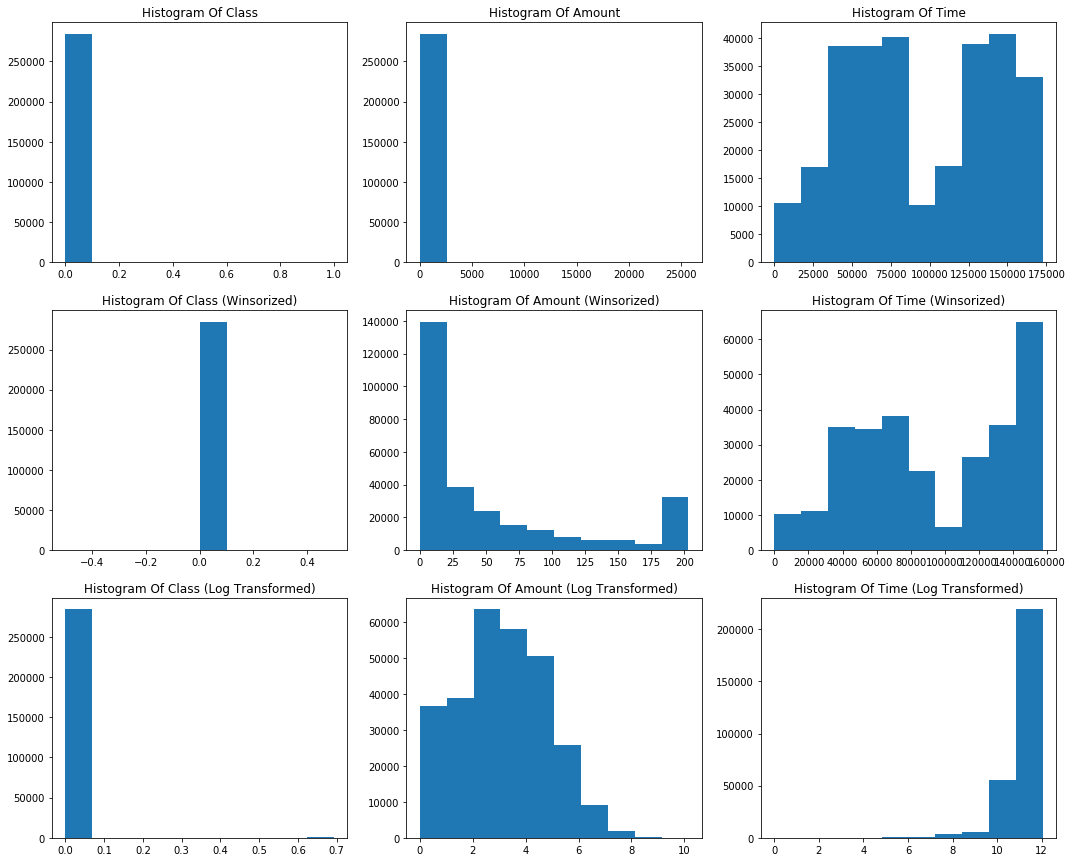

In [30]:
plt.figure(figsize=(18,15))

# Histograms of the original Credit Card Fraud data

plt.subplot(3, 3, 1)
plt.hist(df["Class"])
plt.title("Histogram Of Class")

plt.subplot(3, 3, 2)
plt.hist(df["Amount"])
plt.title("Histogram Of Amount")

plt.subplot(3, 3, 3)
plt.hist(df["Time"])
plt.title("Histogram Of Time")

# Histograms of the winsorized Credit Card Fraud data

plt.subplot(3, 3, 4)
plt.hist(df["winsorized_class"])
plt.title("Histogram Of Class (Winsorized)")

plt.subplot(3, 3, 5)
plt.hist(df["winsorized_amount"])
plt.title("Histogram Of Amount (Winsorized)")

plt.subplot(3, 3, 6)
plt.hist(df["winsorized_time"])
plt.title("Histogram Of Time (Winsorized)")

# Histograms of the log transformed Credit Card Fraud data

plt.subplot(3, 3, 7)
plt.hist(np.log(df["Class"]+1))
plt.title("Histogram Of Class (Log Transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(df["Amount"]+1))
plt.title("Histogram Of Amount (Log Transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(df["Time"]+1))
plt.title("Histogram Of Time (Log Transformed)")


plt.show()

In [31]:
# Jarque-Bera and Normal tests for class, amount, and time

jb_stats = jarque_bera(np.log(df["Class"]+1))
norm_stats = normaltest(np.log(df["Class"]+1))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(df["Amount"]+1))
norm_stats = normaltest(np.log(df["Amount"]+1))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(df["Time"]))
norm_stats = normaltest(np.log(df["Time"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3935548321.0865245 and p value is 0.0
Normality test statistics is 668299.7565789595 and p value is 0.0
Jarque-Bera test statistics is 6112.815232426633 and p value is 0.0
Normality test statistics is 12485.498500627631 and p value is 0.0
Jarque-Bera test statistics is nan and p value is nan
Normality test statistics is nan and p value is nan


C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1687: RuntimeWarning: invalid value encountered in subtract
  diffx = x - mu
C:\ANACONDA\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ANACONDA\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ANACONDA\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1010: RuntimeWarning: invalid value encountered in subtract
  a_zer

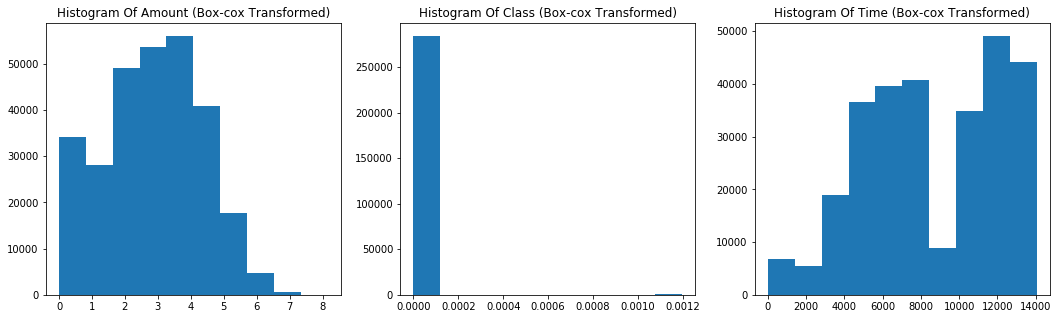

In [32]:
amount_boxcox,_ = boxcox(df["Amount"]+1)
class_boxcox,_ = boxcox(df["Class"]+1)
time_boxcox,_ = boxcox(df["Time"]+1)

plt.figure(figsize=(18,5))

# Histograms of the box-cox transformed data

plt.subplot(1, 3, 1)
plt.hist(amount_boxcox)
plt.title("Histogram Of Amount (Box-cox Transformed)")

plt.subplot(1, 3, 2)
plt.hist(class_boxcox)
plt.title("Histogram Of Class (Box-cox Transformed)")

plt.subplot(1, 3, 3)
plt.hist(time_boxcox)
plt.title("Histogram Of Time (Box-cox Transformed)")

plt.show()

In [33]:
# Jarque-Bera and Normal tests for amount_boxcox, class_boxcox, and time_boxcox

jb_stats = jarque_bera(amount_boxcox)
norm_stats = normaltest(amount_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(class_boxcox)
norm_stats = normaltest(class_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(time_boxcox)
norm_stats = normaltest(time_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 6796.131447018267 and p value is 0.0
Normality test statistics is 19665.07975720435 and p value is 0.0
Jarque-Bera test statistics is 3935548321.0865264 and p value is 0.0
Normality test statistics is 668299.7565789593 and p value is 0.0
Jarque-Bera test statistics is 15412.720669528364 and p value is 0.0
Normality test statistics is 85653.24797548629 and p value is 0.0


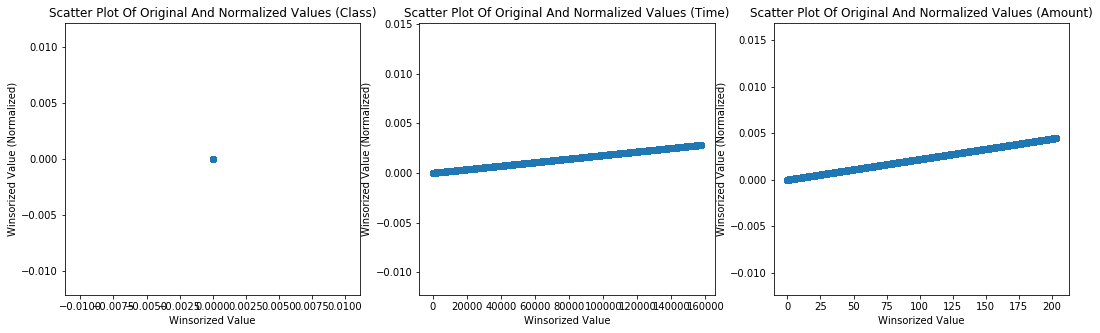

In [34]:
# Normalize the winsorized variables

df["norm_winsorized_class"] = normalize(np.array(df["winsorized_class"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorized_time"] = normalize(np.array(df["winsorized_time"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorized_amount"] = normalize(np.array(df["winsorized_amount"]).reshape(1,-1)).reshape(-1,1)

plt.figure(figsize=(18,5))

# Draw the scatter plots

plt.subplot(1,3,1)

plt.scatter(df["winsorized_class"], df["norm_winsorized_class"])
plt.title("Scatter Plot Of Original And Normalized Values (Class)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,2)

plt.scatter(df["winsorized_time"], df["norm_winsorized_time"])
plt.title("Scatter Plot Of Original And Normalized Values (Time)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,3)

plt.scatter(df["winsorized_amount"], df["norm_winsorized_amount"])
plt.title("Scatter Plot Of Original And Normalized Values (Amount)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.show()

In [35]:
# Supervised learning stuff first then unsupervised learning
# Do Exploratory Data Analysis and Feature Engineering 1 but not Feature Engineering 2
# Do heatmap and pair plot just in case.
# Also, do the cross_val_Scores, accuracy scores, precision scores, recall scores, F1 scores.
# Use Module 29 for the Supervised learning part for the first part of the module.
# Use Module 34.1 for the Unsupervised learning part for the second part of this module.
# Use V1 through V6 as well as class, time, and amount for the univariate and bivariate analyses.
# For the Unsupervised learning part I focus on K Means and GMM and I plot a few graphs.
# There will be one big summary at the end of the module and the first part will deal with Supervised 
# learning and the second part will deal with Unsupervised learning and I think that will be approximately 4 paragraphs.
# Give descriptions for the graphs and put litle notes on the tops of the graphs for clarification.
# As for the introduction, I will use approximately 4 paragraphs.

In [36]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud

In [37]:
#df = resample(df, n_samples=5, replace=False, stratify=df, random_state=0)

# Univariate Analyses

Text(0, 0.5, 'Customers')

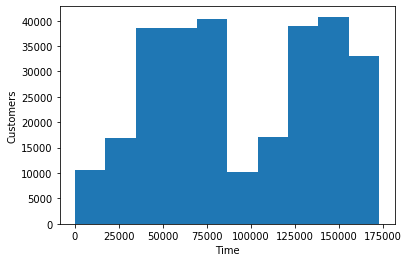

In [38]:
plt.hist(df['Time'])
plt.xlabel('Time')
plt.ylabel('Customers')

Over 9% of the customers have the times from 0 seconds to about 37499, over 40% of the customers have the times from about 37500 seconds to about 87500 seconds, over 9% of the cutomsers have the times from about 87499 seconds to about 110000 seconds, and over 39% of the customers have the times from about 110001 seconds to about 170000 seconds.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6a5e5b2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6a5b32fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6a5b327b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6a5a91940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6a5a91c88>],
 'means': []}

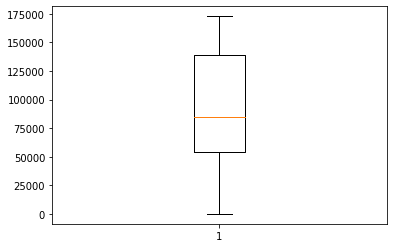

In [39]:
plt.boxplot(df['Time'])

In [40]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <a list of 10 Patch objects>)

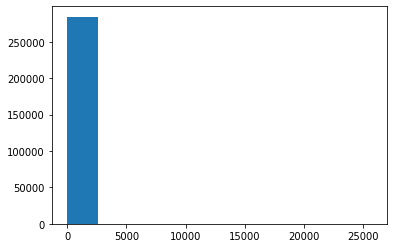

In [41]:
plt.hist(df['Amount'])

All of the customers have transaction amounts between 0 and about 2500 dollars.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6a43364a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6a4336ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6a43360b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6a4336f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6a430a5c0>],
 'means': []}

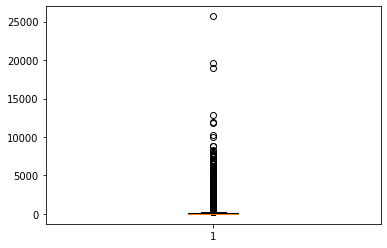

In [42]:
plt.boxplot(df['Amount'])

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

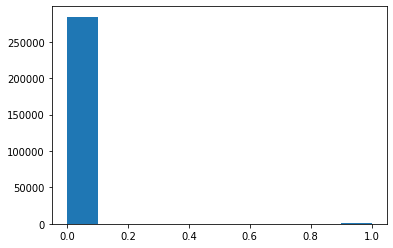

In [43]:
plt.hist(df['Class'])

Almost all of the customers are in Class 0 while only a few of the customers are in Class 1.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6a2a4ee80>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6a26f35c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6a2a4ea90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6a26f3c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6a26f3f98>],
 'means': []}

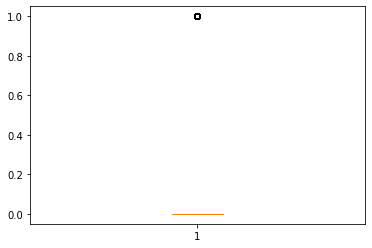

In [44]:
plt.boxplot(df['Class'])

In [45]:
df['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

(array([1.00000e+00, 1.00000e+00, 3.00000e+00, 1.80000e+01, 3.00000e+01,
        8.10000e+01, 1.84000e+02, 8.89000e+02, 9.46200e+03, 2.74138e+05]),
 array([-56.40750963, -50.52126567, -44.63502171, -38.74877774,
        -32.86253378, -26.97628982, -21.09004586, -15.2038019 ,
         -9.31755793,  -3.43131397,   2.45492999]),
 <a list of 10 Patch objects>)

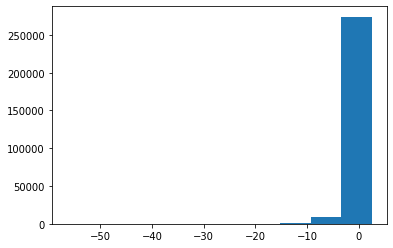

In [46]:
plt.hist(df['V1'])

A little under 95% of the customers have about -4 through +2 while a little over 5% of the customers have about -15 through -5.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6a83a4b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6a7ebd6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6a83a4e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6a7ebd8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6a6f7dc88>],
 'means': []}

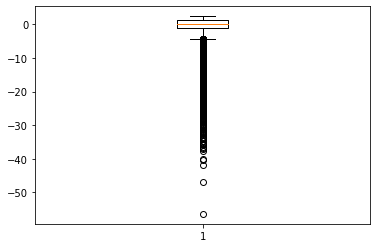

In [47]:
plt.boxplot(df['V1'])

In [48]:
df['V1'].describe()

count    2.848070e+05
mean     3.918649e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

The minimum is about -56.41, the maximum is about 2.45, the median is about 0.02, the 25th percentile is about -0.9, and the 75th percentile is about 1.32.

(array([2.00000e+00, 1.00000e+00, 5.00000e+00, 1.70000e+01, 4.60000e+01,
        1.77000e+02, 1.46300e+03, 2.78631e+05, 4.42700e+03, 3.80000e+01]),
 array([-72.71572756, -63.23838191, -53.76103625, -44.2836906 ,
        -34.80634494, -25.32899929, -15.85165363,  -6.37430798,
          3.10303768,  12.58038334,  22.05772899]),
 <a list of 10 Patch objects>)

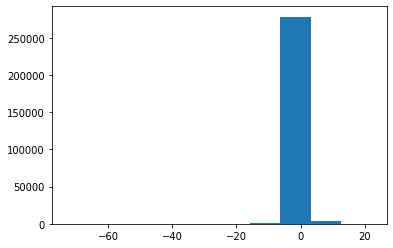

In [49]:
plt.hist(df['V2'])

A little under 5% of the customers are -3 through +1, a little under 1% of the customers are +2 through +16, and a little over 0.3% of the customers are -4 through -16.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6a965df60>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6a9aad240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6a965d588>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6a9aadeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6a9aad9b0>],
 'means': []}

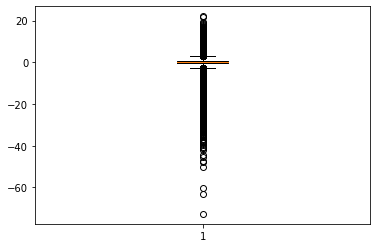

In [50]:
plt.boxplot(df['V2'])

In [51]:
df['V2'].describe()

count    2.848070e+05
mean     5.682686e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64

The maximum is about 22.06, the minimum is about -72.7

(array([1.00000e+00, 0.00000e+00, 5.00000e+00, 1.70000e+01, 3.80000e+01,
        6.80000e+01, 3.50000e+02, 1.81850e+04, 2.66017e+05, 1.26000e+02]),
 array([-48.32558936, -42.55477458, -36.7839598 , -31.01314502,
        -25.24233024, -19.47151546, -13.70070069,  -7.92988591,
         -2.15907113,   3.61174365,   9.38255843]),
 <a list of 10 Patch objects>)

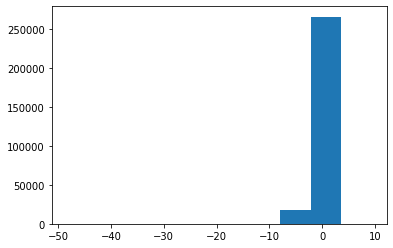

In [52]:
plt.hist(df['V3'])

A little under 95% of the customers are -2 through +4 while a little over 5% of the customers are -9 through -3.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6aefb26a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6aefb2d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6aefb21d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6a8ba5b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6a8ba5c50>],
 'means': []}

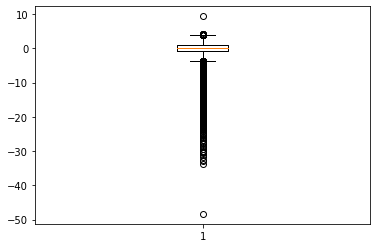

In [53]:
plt.boxplot(df['V3'])

In [54]:
df['V3'].describe()

count    2.848070e+05
mean    -8.761736e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64

The maximum is about 9.38, the minimum is about -48.33, the median is about 0.18, the 25th percentile is about -0.89, and the 75th percentile is about 1.03.

(array([1.5240e+03, 5.0190e+04, 1.8203e+05, 4.3107e+04, 7.5010e+03,
        3.1900e+02, 8.3000e+01, 4.5000e+01, 4.0000e+00, 4.0000e+00]),
 array([-5.6831712 , -3.42731967, -1.17146815,  1.08438337,  3.34023489,
         5.59608642,  7.85193794, 10.10778946, 12.36364099, 14.61949251,
        16.87534403]),
 <a list of 10 Patch objects>)

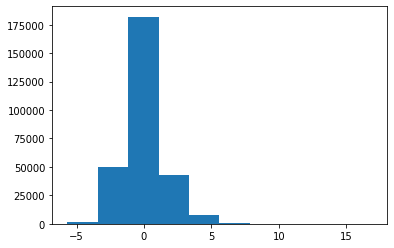

In [55]:
plt.hist(df['V4'])

#284807

Over 18% of the customers are about -6 to about -2, over 63% of the customers are about -1 to about +1, and over 17% of the customers are about +2 to about +7.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6b15f5be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6b14c68d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6b15f5240>],
 'medians': [<matplotlib.lines.Line2D at 0x1f69be74518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f69bf16198>],
 'means': []}

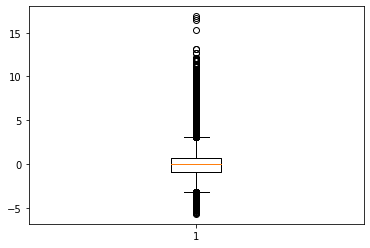

In [56]:
plt.boxplot(df['V4'])

In [57]:
df['V4'].describe()

count    2.848070e+05
mean     2.811118e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, dtype: float64

The maximum is about 16.88, the minimum is about -5.68, the median is about -0.02, the 25th percentile is about -0.85, and the 75th percentile is about 0.74.

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        1.10000e+01, 2.52000e+02, 2.83733e+05, 7.87000e+02, 2.10000e+01]),
 array([-113.74330671,  -98.88880945,  -84.03431219,  -69.17981493,
         -54.32531768,  -39.47082042,  -24.61632316,   -9.7618259 ,
           5.09267136,   19.94716862,   34.80166588]),
 <a list of 10 Patch objects>)

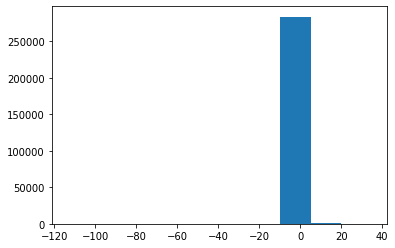

In [58]:
plt.hist(df['V5'])

Over 99% of the customers are about -10 to about +5 while over 0.3% of the customers are about +6 to about +20.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f69bd609b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f69bdce5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f69bd60cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f69bdce748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f69bdcecc0>],
 'means': []}

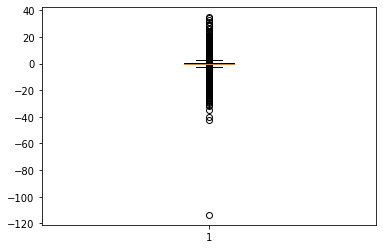

In [59]:
plt.boxplot(df['V5'])

In [60]:
df['V5'].describe()

count    2.848070e+05
mean    -1.552103e-15
std      1.380247e+00
min     -1.137433e+02
25%     -6.915971e-01
50%     -5.433583e-02
75%      6.119264e-01
max      3.480167e+01
Name: V5, dtype: float64

The maximum is about 34.80, the minimum is about -113.74, the median is about -0.05, the 25th percentile is about -0.69, and the 75th percentile is about 0.61.

(array([1.30000e+01, 1.71000e+02, 2.77728e+05, 6.87100e+03, 2.20000e+01,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-26.16050594, -16.21429279,  -6.26807964,   3.67813351,
         13.62434666,  23.57055981,  33.51677295,  43.4629861 ,
         53.40919925,  63.3554124 ,  73.30162555]),
 <a list of 10 Patch objects>)

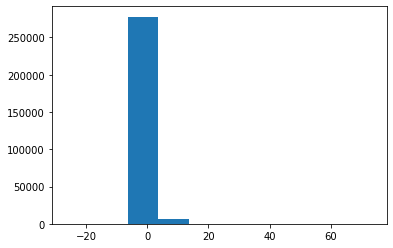

In [61]:
plt.hist(df['V6'])

Approximately less than 97% of the customers are about -6 to about +4 while approximately over 3% of the customers are about +5 to about +14.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f69bcd8d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1f69bcd84e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f69bcd8198>],
 'medians': [<matplotlib.lines.Line2D at 0x1f69bcbb080>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f69bcbb048>],
 'means': []}

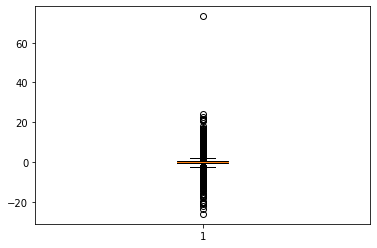

In [62]:
plt.boxplot(df['V6'])

In [63]:
df['V6'].describe()

count    2.848070e+05
mean     2.040130e-15
std      1.332271e+00
min     -2.616051e+01
25%     -7.682956e-01
50%     -2.741871e-01
75%      3.985649e-01
max      7.330163e+01
Name: V6, dtype: float64

The maximum is about 73.30, the minimum is about -26.16, the median is about -0.27, the 25th percentile is about -0.77, and the 75th percentile is about 0.40.

# Bivariate Analysis

Text(0, 0.5, 'Amount')

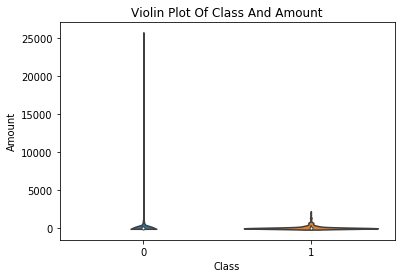

In [64]:
sns.violinplot(x=df['Class'], y=df['Amount'], df = pd.read_excel(r'C:\Users\Darin Peacock\Documents\Creditcard.xlsx'), size=8)
plt.title("Violin Plot Of Class And Amount")
plt.xlabel("Class")
plt.ylabel("Amount")

The customers in Class 0 pay amounts from 0 dollars to about 26000 dollars with the majority of the customers paying 0 dollars to about 500 dollars and with the minority of the customers paying about 501 dollars to about 26000 dollars. The customers in Class 1 pay amounts from 0 dollars to about 2500 dollars with the majority paying 0 dollars to about 1250 dollars and with the minority paing about 1251 dollars to about 2500 dollars.

Text(0, 0.5, 'Time')

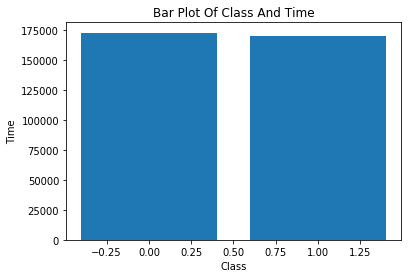

In [65]:
plt.bar(df['Class'], df['Time'])
plt.title("Bar Plot Of Class And Time")
plt.xlabel("Class")
plt.ylabel("Time")

Class 0 has the time of about 174000 seconds while Class 1 has the time of about 173000 seconds.

Text(0, 0.5, 'Time')

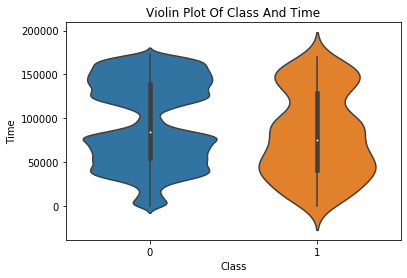

In [66]:
sns.violinplot(x=df['Class'], y=df['Time'], df = pd.read_excel(r'C:\Users\Darin Peacock\Documents\Creditcard.xlsx'), size=8)
plt.title("Violin Plot Of Class And Time")
plt.xlabel("Class")
plt.ylabel("Time")

The majority of Class 0 has times from 0 seconds to about 100000 seconds while the minority of Class 0 has times from about 100001 seconds to about 180000 seconds. The majority of Class 1 has times from 0 seconds to about 125000 seconds while the minority of Class 1 has times from about 125001 seconds to about 200000 seconds.

Text(0, 0.5, 'Time')

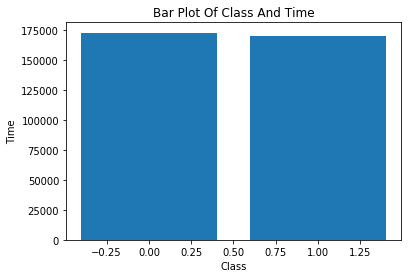

In [67]:
plt.bar(df['Class'], df['Time'])
plt.title("Bar Plot Of Class And Time")
plt.xlabel("Class")
plt.ylabel("Time")

The customers of Class 0 have times from 0 seconds to 174000 seconds while the customers of Class 1 have times from 0 seconds to 173000 seconds.

In [ ]:
sns.violinplot(x=df['Class'], y=df['V1'], df = pd.read_excel(r'C:\Users\Darin Peacock\Documents\Creditcard.xlsx'), size=8)
plt.title("Violin Plot Of Class And V1")
plt.xlabel("Class")
plt.ylabel("V1")

The majority of Class 0 has about -6 to about +2 while the minority of Class 0 has about -7 to about -57. The majority of Class 1 has about -8 to about +4 while the minoirty of Class 1 has about -9 to about -34.

In [ ]:
# Do the two boxes of code right after EDA then apply the two boxes of code the go down to the five methods.

# Gradient Boosting

In [ ]:
Y = df['Class']
X = df.drop(columns=['Class'])
X.head()

In [ ]:
# Obtaining the cross_val_scores of Gradient Boosting

classifier = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
print(cross_val_score(classifier, X, Y, cv=5))

In [ ]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Gradient Boosting Classifier

classifier = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0).fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

In [ ]:
# Model Evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# Gradient Boosting Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

# Random Forest

In [ ]:
# Obtaining the cross_val_scores of Random Forest

random_forest = RandomForestClassifier(max_depth=2, max_features=3)
print(cross_val_score(random_forest, X, Y, cv=5))

In [ ]:
# Tuning of hyperparameters

random_forest = RandomForestClassifier(max_depth=3, max_features=4)
print(cross_val_score(random_forest, X, Y, cv=5))

In [ ]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Random Forest Classifier

random_forest = RandomForestClassifier(max_depth=2, max_features=3).fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

In [ ]:
# Model Evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# Random Forest Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

# Logistic Regression

In [ ]:
# Obtaining the cross_val_scores of Logistic Regression

clf = LogisticRegression(random_state=0).fit(X, Y)
print(cross_val_score(clf, X, Y, cv=5))

In [ ]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Logistic Regression Classifier

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

In [ ]:
# Model Evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# Logistic Regression Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

# Decision Tree

In [ ]:
# Obtaining the cross_val_scores of Decision Tree

clf = tree.DecisionTreeClassifier()
print(cross_val_score(clf, X, Y, cv=5))

In [ ]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Decision Tree Classifier

clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

In [ ]:
# Model Evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# Decision Tree Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

# KNN Classifier

In [ ]:
# StandardScaler

#scaler = StandardScaler()
#print(scaler.fit(X, Y))
#StandardScaler()
#print(scaler.transform(X))

In [ ]:
#X = scaler.transform(X)

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#X = df[['Amount', 'Time']]
#Y = df.Class
#print(cross_val_score(knn, X, Y, cv=5))

In [ ]:
# Obtaining the cross_val_scores of KNN Classifier

#knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#print(cross_val_score(knn, X, Y, cv=5))

In [ ]:
# Obtaining the cross_val_scores of KNN Classifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
print(cross_val_score(knn, X, Y, cv=5))

In [ ]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

In [ ]:
# Model evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# KNeighbors Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

# Unsupervised Learning

# K Means

In [ ]:
df.dtypes

In [ ]:
X = df
#Y = df.to_numpy()
#df = pd.read_csv(("https://raw.githubusercontent.com/llimllib/bostonmarathon/""master/results/2014/results.csv")).dropna()
#df = df.drop(columns=['country','city','state','name','ctz','25k','35k','30k','5k','40k'])
#df['gender'] = df['gender'].map({'M': 1, 'F': 0})
#df['bib'] = df['bib'][df['bib'].apply(lambda x: x.isnumeric())]
#df = df[df['bib'].notna()]
#df.replace('-', '')
X.head(10)

In [ ]:
#X

In [ ]:
X.dtypes

In [ ]:
X = df.to_numpy()

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [ ]:
y_pred = KMeans(n_clusters=4, random_state=123).fit_predict(X)

plt.scatter(X[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

The cluster set here matches the first prerequisite for K-means which is k clusters because the k value is 4 here. The cluster set does not match the second prerequisite for K-means which is clusters being isotropic because the four clusters here are not isotropic. The cluster set does not match the thrid prerequisite for K-means which is similar variance because the four clusters do not have similar variance.

In [ ]:
range_n_clusters = list (range(2,4))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=4)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For 4 clusters = {}, silhouette score is {})".format(n_clusters, score))

The silhouette scores for the k value of 4 with a range rom 2 to 10 are all the same. The silhouette score is about 0.408 and this silhouette score means that the object is decently matched to its own cluster in comparison to other clusters.

In [ ]:
# Dimensionality Reduction With PCA

In [ ]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = df.age[indices] / 255.0
y = df.bib[indices]

print(X.shape, y.shape)

In [ ]:
X = X.dropna()
X = np.array(X)
X = X.reshape(-1,2)
y = y.dropna()
y = np.array(y)
y = y.reshape(-1,2)

In [ ]:
X

In [ ]:
y

In [ ]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Clustering With Gaussian Mixture Models

In [ ]:
X = df.Time[indices] / 255.0
y = df.Amount[indices]

In [ ]:
X = X.dropna()
X = np.array(X)
X = X.reshape(-1,2)

In [ ]:
X

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
y = y.dropna()
y = np.array(y)
y = y.reshape(-1,2)

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_pca = PCA(2).fit_transform(X_std)
gmm_cluster4 = GaussianMixture(n_components=4, random_state=123)
# Fit model
clusters4 = gmm_cluster4.fit_predict(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters4)
plt.show()

The cluster set matches the first assumption of Gaussian Mixture Models which is that there are k distributions that generate the data because the k value here is 4. The cluster set matches the second assumption of Gaussian Mixture Models which is that all of the k distributions are Gaussians because they are Gaussians.

In [ ]:
range_n_clusters = list (range(2,4))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=4)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For 4 clusters = {}, silhouette score is {})".format(n_clusters, score))

The silhouette scores for the k value of 4 with a range from 2 to 10 are mostly different this time. The silhouette scores for the range numbers of 2, 3, and 7 are both about 0.424; the silhouette scores for the range numbers of 4, 5, 6, and 8 are about 0.415; the silhouette scores for the range number of 9 is about 0.425. These silhouette scores mean that the object is decently matched to its own cluster in comparison to other clusters.

# Summary